In [1]:
"""
jupyter nbconvert --to markdown test.ipynb --output README.md

<div align="center">
<img src="img/" alt="rec" width="900px">
</div> 
"""
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


from IPython.display import display
from pprint import pprint

import pickle
from graph.graph_info import GraphManager, InfoManager


def add_to_pickle(path, item):
    with open(path, 'wb') as file:
        pickle.dump(item, file, pickle.HIGHEST_PROTOCOL)


def read_from_pickle(path):
    with open(path, 'rb') as file:
        return pickle.load(file)


g: GraphManager = GraphManager()
g_serialized = read_from_pickle('data/info/graph_serialized.dat')
g = g_serialized


inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
print(inf.shape)
inf = inf[(inf.level_no != 0)] 
df = inf[~inf['similarity_with_l0th_parent_teket'].isnull()]
print(inf.shape, df.shape, inf.columns)

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    'font.size': 14
})


(24326, 51)
(24325, 51) (17314, 51) Index(['paper_id', 'uuid', 'parent_paper_uuid', 'parent_paper_id', 'title',
       'level_no', 'multiple_appearances_in_levels_count',
       'multiple_appearances_in_levels', 'path_from_root', 'reference_count',
       'citation_count', 'influential_citation_count', 'published_date',
       'paper_type', 'venue', 'isOpenAccess', 'abstract', 'paper_link', 'doi',
       'download_link', 'tldl', 'embedding', 'age', 'influence_score',
       'similarity_with_l0th_parent_teket',
       'similarity_with_l1th_parent_teket',
       'similarity_with_l2th_parent_teket',
       'similarity_with_level_0_parent_em',
       'similarity_with_level_1_parent_em',
       'similarity_with_level_2_parent_em',
       'similarity_with_immediate_parent_em', 'in_deg_centrality',
       'out_deg_centrality', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'eigenvector_centrality', 'load_centrality',
       'in_deg_centrality_norm', 'out_deg_cen

In [6]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')


In [7]:
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    'font.size': 14
})


In [8]:
def plot_one_vs_all_singleplot(df, x_col, y_cols, figsize=(20, 10), title=None, ylim=None, xlim=None, x_label=None, y_label=None, save_path=None, save_format='png', plot_type='scatter'):
	np.random.seed(43)
	fig, ax = plt.subplots(figsize=figsize)
	for y in y_cols:
		if plot_type == 'bar':
			ax.bar(df[x_col], df[y], label=y, color=np.random.rand(3, ))
		elif plot_type == 'line':
			ax.plot(df[x_col], df[y], label=y, color=np.random.rand(3,))
		else:
			ax.scatter(df[x_col], df[y], label=y, color=np.random.rand(3,))
	ax.legend()
	if title:
		ax.set_title(title)
	if ylim:
		ax.set_ylim(ylim)
	if xlim:
		ax.set_xlim(xlim)
	if x_label:
		ax.set_xlabel(x_label)
	if y_label:
		ax.set_ylabel(y_label)
	if save_path:
		plt.savefig(save_path, format=save_format, dpi=300)
	if x_label:
		ax.set_xlabel(x_label)
	if y_label:
		ax.set_ylabel(y_label)
	# plt.show()


In [9]:
def plot_one_vs_all_subplots(df, x_col, y_cols, figsize=(20, 30), ylim=None, xlim=None,
                             x_label=None, y_labels=False, y_labels_dict=None,
                             save_path=None, save_format='png', plot_type='scatter',
                             random_seed=43, plot_with_seaborn=False, palette='Set1', hue=None, dpi=300):
	np.random.seed(random_seed)
	total_features_len = len(y_cols)
	total_subplots_row_len = int(total_features_len / 2) + \
		1 if total_features_len % 2 != 0 else int(total_features_len / 2)

	repeated_x_cols = [x_col] * total_features_len

	fig, ax = plt.subplots(total_subplots_row_len, 2, figsize=figsize, dpi=dpi)
	i = r = c = 0
	for x_col_, y_col_ in zip(repeated_x_cols, y_cols):
		if (i % 2 == 0) & (i > 0):
			r += 1
			c = 0
		# print(r,c)

		if not plot_with_seaborn:
			if plot_type == 'bar':
				ax[r, c].bat(df[x_col_], df[y_col_], label=y_col_,
				             color=np.random.rand(3, ))
				if x_label:
					ax[r, c].set_xlabel(x_label)
				else:
					ax[r, c].set_xlabel(x_col_)

				if y_labels:
					ax[r, c].set_ylabel(y_labels_dict[y_col_])
				else:
					ax[r, c].set_ylabel(y_col_)
			else:
				ax[r, c].scatter(df[x_col_], df[y_col_], label=y_col_,
				                 color=np.random.rand(3,))
				if x_label:
					ax[r, c].set_xlabel(x_label)
				else:
					ax[r, c].set_xlabel(x_col_)

				if y_labels:
					ax[r, c].set_ylabel(y_labels_dict[y_col_])
				else:
					ax[r, c].set_ylabel(y_col_)
		else:
			if plot_type == 'bar':
				sns.barplot(x=x_col_, y=y_col_, data=df,
				            ax=ax[r, c], palette=palette, hue=hue)
			else:
				sns.scatterplot(x=x_col_, y=y_col_, data=df,
				                ax=ax[r, c], palette=palette, hue=hue)

		i += 1
		c += 1

	if save_path:
		plt.savefig(save_path, format=save_format, dpi=dpi)


In [10]:
def plot_level_i_top_k(data, sum_cols, cols_for_plots, level_no=3, sort_col='average',
                       plot_type='line', n=None, save_format='png', save_path=None, legend_dic=None):
	selected_cols_for_plots =   cols_for_plots+['average']

	# X = data[all_cols].copy()
	X = data.drop_duplicates(subset=['paper_id'], keep='first').copy()

	# X['Result'] = operation_callback(X, operation_cols)
	X['average'] = X[sum_cols].sum(axis=1)
	X['average'] = X['average'] / len(sum_cols)

	X_level_i = X[X['level_no'] == level_no]
	if n:
		level_i_paper_len = n
	else:
		level_i_paper_len = X_level_i.shape[0]
	if sort_col != 'average':
		# average_label=sort_col
		average_label = f'Avg({",".join([f"w{i}" for i in range(len(sum_cols))])})'
	else:
		average_label = f'Avg({",".join([f"w{i}" for i in range(len(sum_cols))])})'

	level_i_top_k = X_level_i.sort_values(by=sort_col, ascending=False)[
            selected_cols_for_plots].head(level_i_paper_len)

	np.random.seed(43)
	x = np.arange(len(level_i_top_k))
	fig, ax = plt.subplots(figsize=(16, 8))
	for i,v in enumerate(level_i_top_k.columns):
		if plot_type == 'line':
			if v == 'average':
				ax.plot(x, level_i_top_k[v], label=average_label, color='black')
			else:
				ax.plot(x, level_i_top_k[v], label=f'w{i}: {v}', color=np.random.rand(3,))

		elif plot_type == 'scatter':
			if v == 'average':
				ax.scatter(x, level_i_top_k[v], label=average_label, color='black')
			else:
				if legend_dic:
					ax.scatter(x, level_i_top_k[v], label=f'w{i}: {legend_dic[v]}',
                                    color=np.random.rand(3,))
				else:
					ax.scatter(x, level_i_top_k[v],
					           label=f'w{i}: {v}', color=np.random.rand(3,))

	# plt.xlabel(
	# 	f'Level {level_no}: Top {level_i_paper_len} ranked papers; sort by: `{sort_col}` score')
	plt.xlabel(f'Level {level_no}: Papers ranked according to similarity with parent at level 0')
	plt.ylabel('Scores')
	plt.legend(loc='upper right')
	
	
	if save_path:
		plt.savefig(save_path,format=save_format, transparent=False, dpi=300)


In [11]:
def plot_level_i_top_k_agg(data, sum_cols, cols_for_plots, level_no=3, sort_col='aggregate', plot_type='line',n=None,legend_dic=None,save_format='png',save_path=None):
	selected_cols_for_plots =   cols_for_plots+['aggregate']

	# X = data[all_cols].copy()
	X = data.drop_duplicates(subset=['paper_id'], keep='first').copy()

	# X['Result'] = operation_callback(X, operation_cols)
	X['aggregate'] = X[sum_cols].sum(axis=1)

	X_level_i = X[X['level_no'] == level_no]
	if n:
		level_i_paper_len = n
	else:
		level_i_paper_len = X_level_i.shape[0]
	if sort_col != 'aggregate':
		# average_label=sort_col
		aggregate_label = f'Agg({",".join([f"w{i}" for i in range(len(sum_cols))])})'
	else:
		aggregate_label = f'Agg({",".join([f"w{i}" for i in range(len(sum_cols))])})'

	level_i_top_k = X_level_i.sort_values(by=sort_col, ascending=False)[
            selected_cols_for_plots].head(level_i_paper_len)

	np.random.seed(43)
	x = np.arange(len(level_i_top_k))
	fig, ax = plt.subplots(figsize=(16, 8))
	for i,v in enumerate(level_i_top_k.columns):
		if plot_type == 'line':
			if v == 'aggregate':
				ax.plot(x, level_i_top_k[v], label=aggregate_label, color='black')
			else:
				if legend_dic:
					ax.plot(x, level_i_top_k[v], label=f'w{i}: {legend_dic[v]}', color=np.random.rand(3,))
				else:
					ax.plot(x, level_i_top_k[v], label=f'w{i}: {v}', color=np.random.rand(3,))
		elif plot_type == 'scatter':
			if v == 'aggregate':
				ax.scatter(x, level_i_top_k[v], label=aggregate_label, color='black')
			else:
				if legend_dic:
					ax.scatter(x, level_i_top_k[v], label=f'w{i}: {legend_dic[v]}',
					        color=np.random.rand(3,))
				else:
					ax.scatter(x, level_i_top_k[v], label=f'w{i}: {v}', color=np.random.rand(3,))


	# plt.xlabel(
	# 	f'Level {level_no}: Top {level_i_paper_len} ranked papers; sort by: `{sort_col}` score')
	plt.xlabel(
            f'Level {level_no}: Papers ranked according to similarity with parent at level 0')
	plt.ylabel('Scores')

	plt.legend(loc='upper right')

	if save_path:
		plt.savefig(save_path, format=save_format, transparent=False, dpi=300)


In [12]:
def save_plot(plt, dir_name, filename, formatting='png', transparent=False, dpi=300):
	if not os.path.exists(dir_name):
		os.makedirs(dir_name)
	plt.savefig(f"{dir_name}/{filename}.{formatting}",
	            format=formatting, transparent=transparent, dpi=dpi)


## semantic analysis

### Univariate analysis

In [46]:
# level_1 = inf[inf['level_no'] == 1]['paper_id'].values.tolist()
# level_2 = inf[inf['level_no'] == 2]['paper_id'].values.tolist()
# level_3 = inf[inf['level_no'] == 3]['paper_id'].values.tolist()



In [47]:
# level_2_unique = list(set(level_2) - set(level_1))
# level_3_unique = list(set(level_3) - (set(level_1)|set(level_2)))


In [48]:
# set(level_1) & set(level_2_unique), set(level_1) & set(level_3_unique), set(level_2_unique) & set(level_3_unique)


(set(), set(), set())

In [49]:
# all_level_unique = list(set(level_1) | set(level_2_unique) | set(level_3_unique))
# len(all_level_unique)

9268

In [51]:
# D = inf[inf['paper_id'].isin(all_level_unique)]
# D.shape

(24325, 48)

In [90]:
inf.columns

Index(['paper_id', 'uuid', 'parent_paper_uuid', 'parent_paper_id', 'title',
       'level_no', 'multiple_appearances_in_levels_count',
       'multiple_appearances_in_levels', 'path_from_root', 'reference_count',
       'citation_count', 'influential_citation_count', 'published_date',
       'paper_type', 'venue', 'isOpenAccess', 'abstract', 'paper_link', 'doi',
       'download_link', 'tldl', 'embedding', 'age',
       'citation_count_min_max_norm', 'age_min_max_norm', 'influence_score',
       'similarity_with_l0th_parent_teket',
       'similarity_with_l1th_parent_teket',
       'similarity_with_l2th_parent_teket',
       'similarity_with_level_0_parent_em',
       'similarity_with_level_1_parent_em',
       'similarity_with_level_2_parent_em',
       'similarity_with_immediate_parent_em', 'in_deg_centrality',
       'out_deg_centrality', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'eigenvector_centrality', 'load_centrality',
       'in_deg_centrali

In [91]:
def save_plot(plt,dir_name,filename,formatting='png',transparent=False,dpi=300):
	if not os.path.exists(dir_name):
		os.makedirs(dir_name)
	plt.savefig(f"{dir_name}/{filename}.{formatting}",format=formatting,transparent=transparent,dpi=dpi)


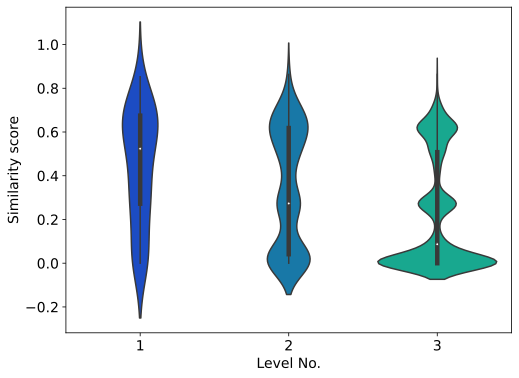

In [99]:
plt.figure(dpi=300,figsize=(8,6))
D=df
dir_name = 'plots/sim'
f = 'similarity_with_l0th_parent_teket'
# D = inf[(inf.level_no != 1) ]  # & (inf.level_no != 0)
sns.violinplot(data=D, x="level_no",
               y=f, palette="winter")
t = 'violinplot'
filename = f'{f}_{t}-8x6-dpi300-font-14' 
plt.xlabel("Level No.")
plt.ylabel("Similarity score")
# plt.title("Similarity between papers at level-1/2/3 and their parent at level-0")
# plt.xticks([1,2,3])
# How similarity with a paper's immediate parent changes with levels

# plt.xticks(rotation=90)
# plt.ylim(-.1,1)


for f in ['png','svg']:
    save_plot(plt,dir_name,filename,formatting=f)


### Bivariate analysis

In [107]:
x = np.arange(len(D))
x

array([    0,     1,     2, ..., 17311, 17312, 17313])

In [119]:
# fig, ax = plt.subplots(figsize=(30, 8))
# ax.scatter(x, df['similarity_with_l0th_parent_teket'], color='#1878a7')
# ax.scatter(x, df['similarity_with_immediate_parent_teket'], color='#18a88f')



## Influence

In [159]:
inf = pd.read_csv('data/info/info_full_ss_new_x.csv')
inf.shape

(24326, 51)

In [160]:
# from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler


In [161]:
# min_max = MinMaxScaler()
# inf['citation_count_min_max_norm'] = min_max.fit_transform(
#     inf['citation_count'].values.reshape(-1, 1))
# inf['age_min_max_norm'] = min_max.fit_transform(
#     inf['age'].values.reshape(-1, 1))

# standard = StandardScaler()

# inf['citation_count_standard_norm'] = standard.fit_transform(
#     inf['citation_count'].values.reshape(-1, 1))
# inf['age_standard_norm'] = standard.fit_transform(
#     inf['age'].values.reshape(-1, 1))
# inf.head(n=2)


In [162]:
# inf.columns

In [163]:
# inf.to_csv('data/info/info_full_ss_new_x.csv', index=False)

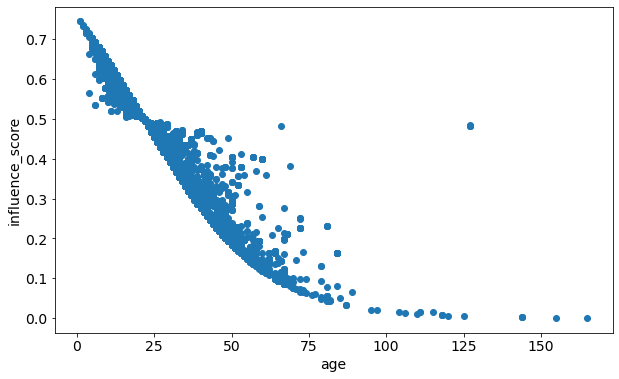

In [164]:

# def calculateFreshness(row):
# 	_y = .3
# 	impact = row['citation_count_standard_norm'] + 1
# 	numerator = 1
# 	denominator = 1 + np.exp(_y * (1 / impact) * row['age_standard_norm'])
# 	return numerator / denominator


# inf['influence_score'] = inf.apply(calculateFreshness, axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(inf['age'], inf['influence_score'])
plt.xlabel('age')
plt.ylabel('influence_score')
plt.show()


In [142]:
inf[((inf['age']==40))&(inf['citation_count']>10000)].sort_values(by='influence_score',ascending=False)[:2][['age','influence_score','citation_count']]

age  influence_score  citation_count
23760  40.0         0.481946           59190
16735  40.0         0.481923           59104

In [143]:
inf[(inf['age']==40)].sort_values(by='influence_score',ascending=True)[:2][['age','influence_score','citation_count']]

age  influence_score  citation_count
8897   40.0         0.359412               2
21316  40.0         0.359428               3

In [155]:
inf.drop(columns=['influence_score_v1'], inplace=True)


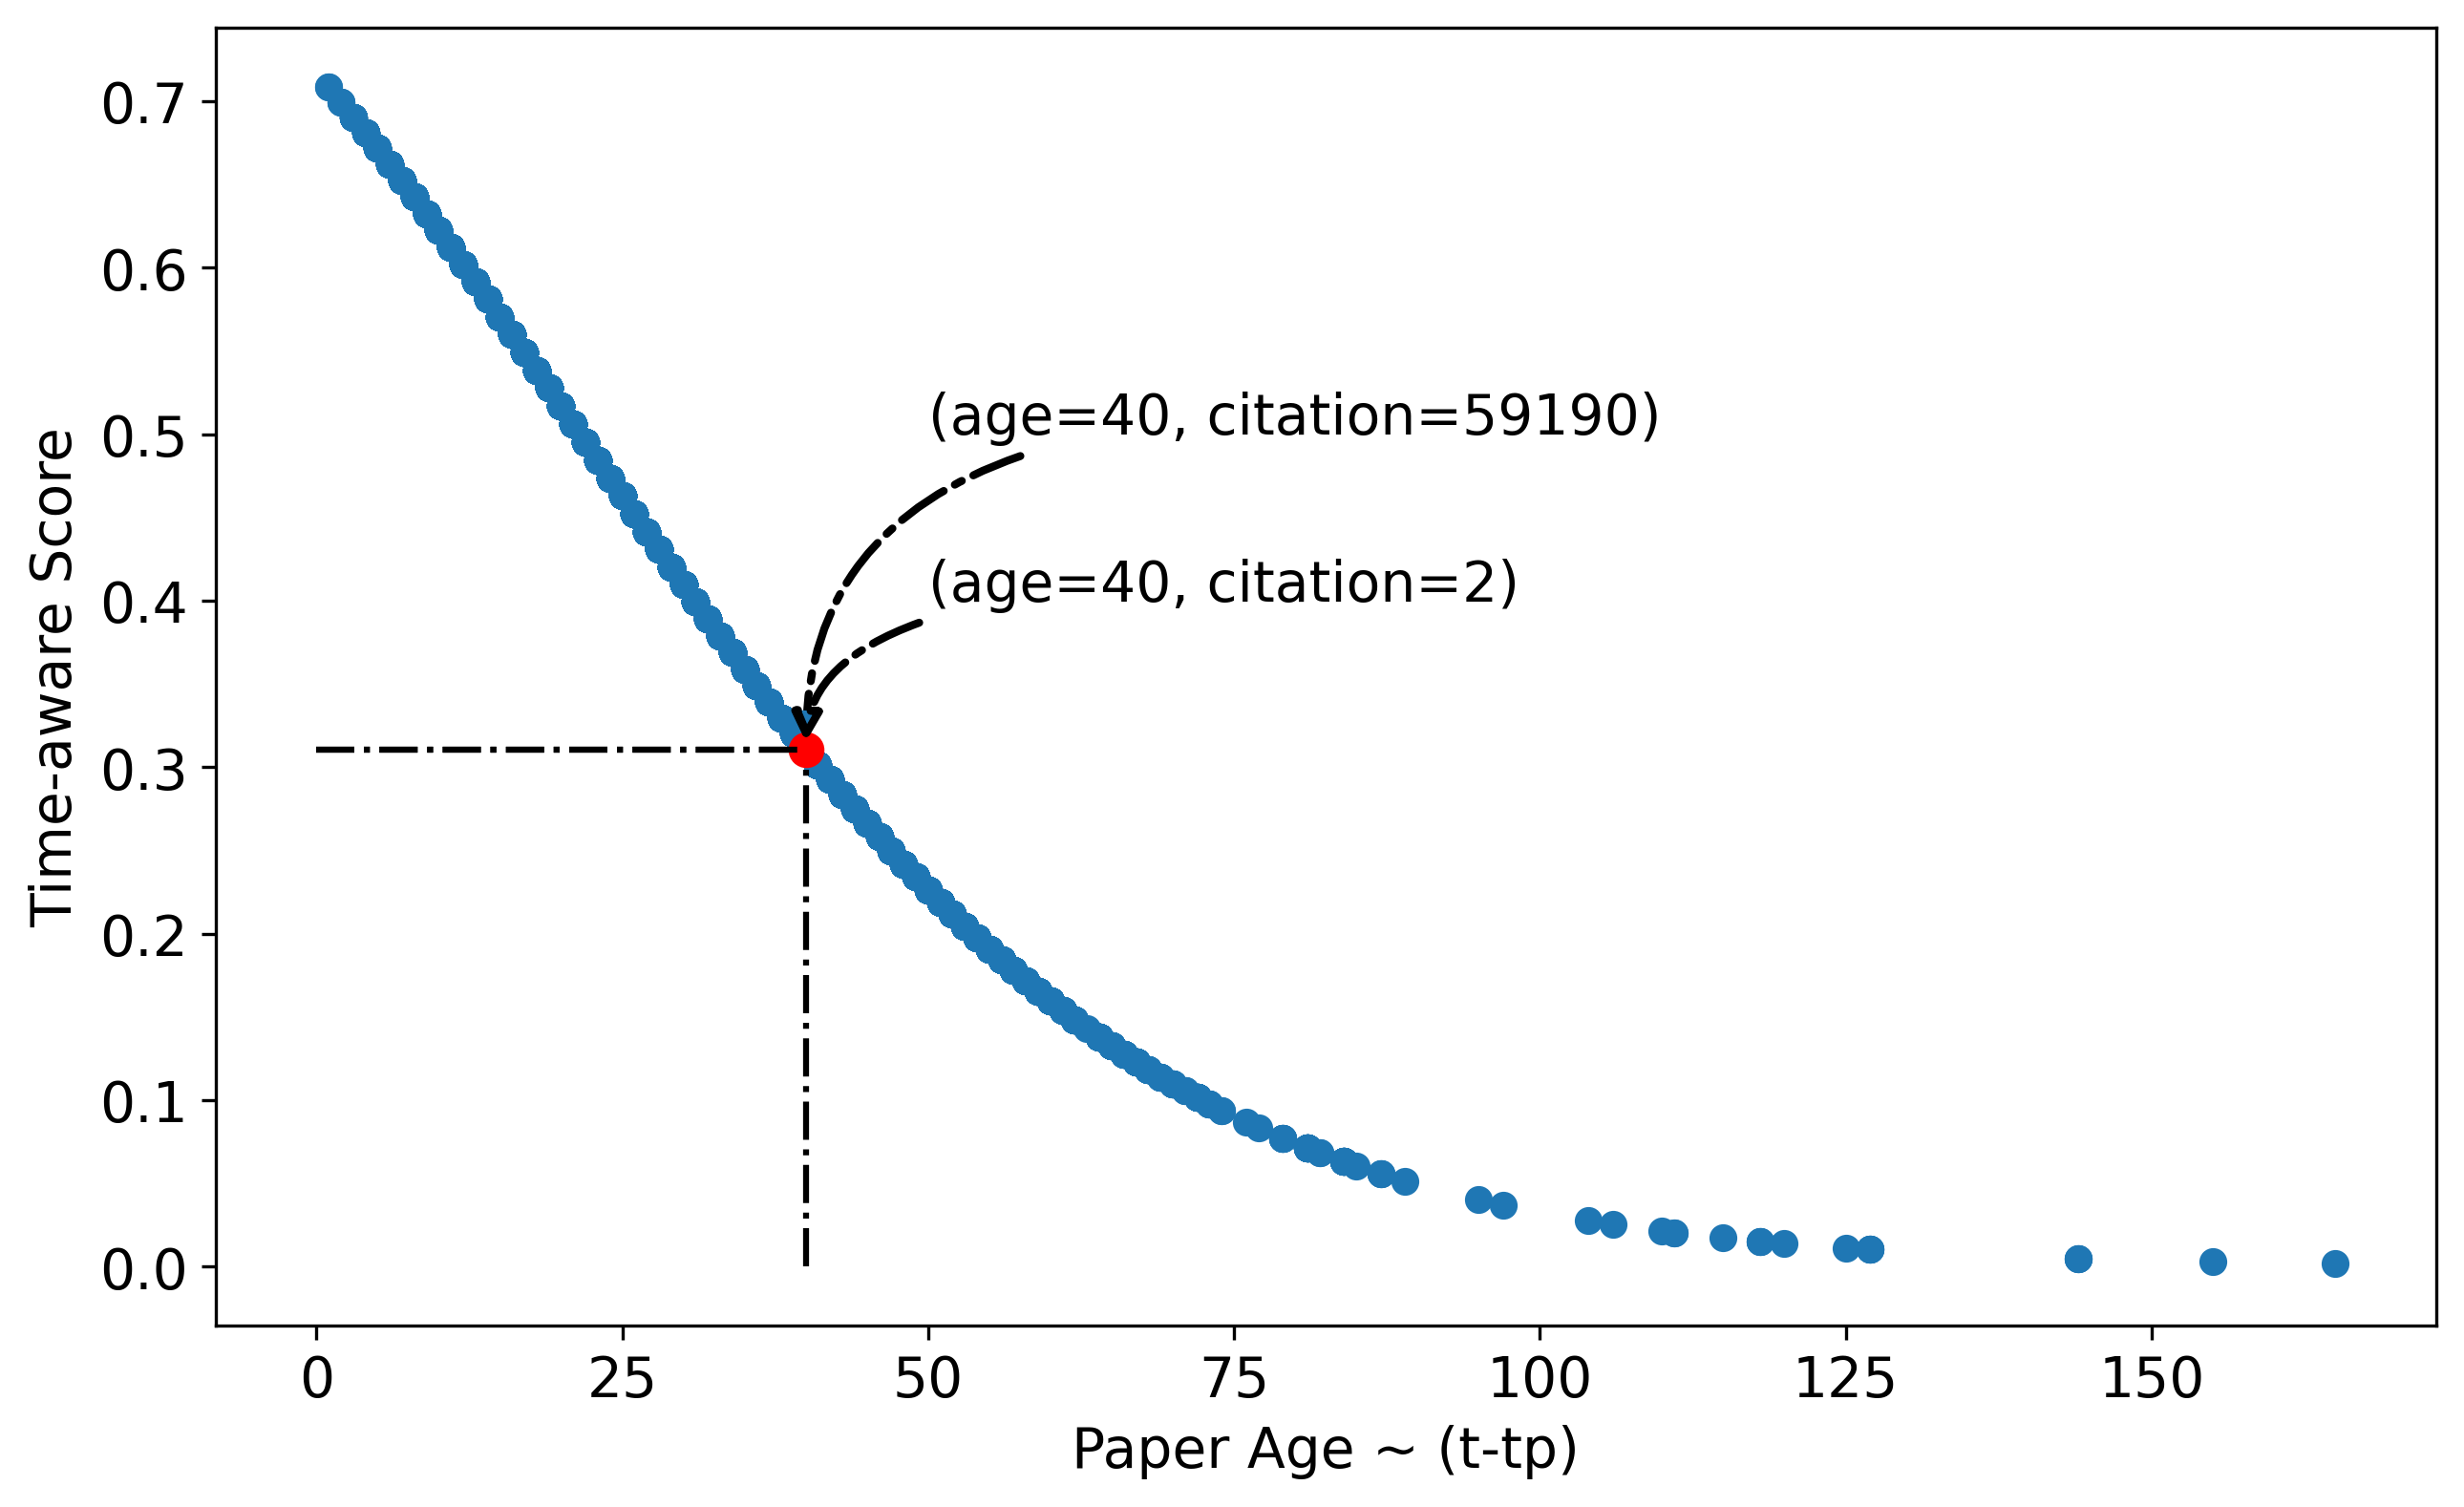

In [165]:
# def calculateFreshness(row):
# 	_y = .5
# 	numerator = 1
# 	denominator = 1 + np.exp(_y * row['age_standard_norm'])
# 	return numerator / denominator


# inf['influence_score_test'] = inf.apply(calculateFreshness, axis=1)
fig, ax = plt.subplots(figsize=(10, 6),dpi=300)
ax.scatter(inf['age'], inf['influence_score_test'])

ax.annotate('(age=40, citation=59190)', xy=(40.0, 0.31046),
            xytext=(50, 0.5), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.31046, 0.31046], linestyle="-.", color="black")
ax.plot([40.0], [0.31046], marker="o", markersize=8,
         markeredgecolor="red", markerfacecolor="red")

ax.annotate('(age=40, citation=2)', xy=(40.0, 0.31046),
            xytext=(50, 0.4), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.31046, 0.31046], linestyle="-.", color="black")
# vertical line
ax.plot([40.0, 40.0], [0, .3], linestyle="-.", color="black")

plt.xlabel('Paper Age ~ (t-tp)')
plt.ylabel('Time-aware Score')

for f in ['png','svg']:
    save_plot(plt, 'plots/influence',
              'time_aware_score_v1-10x6-dpi300-font-14', formatting=f)


In [4]:
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})


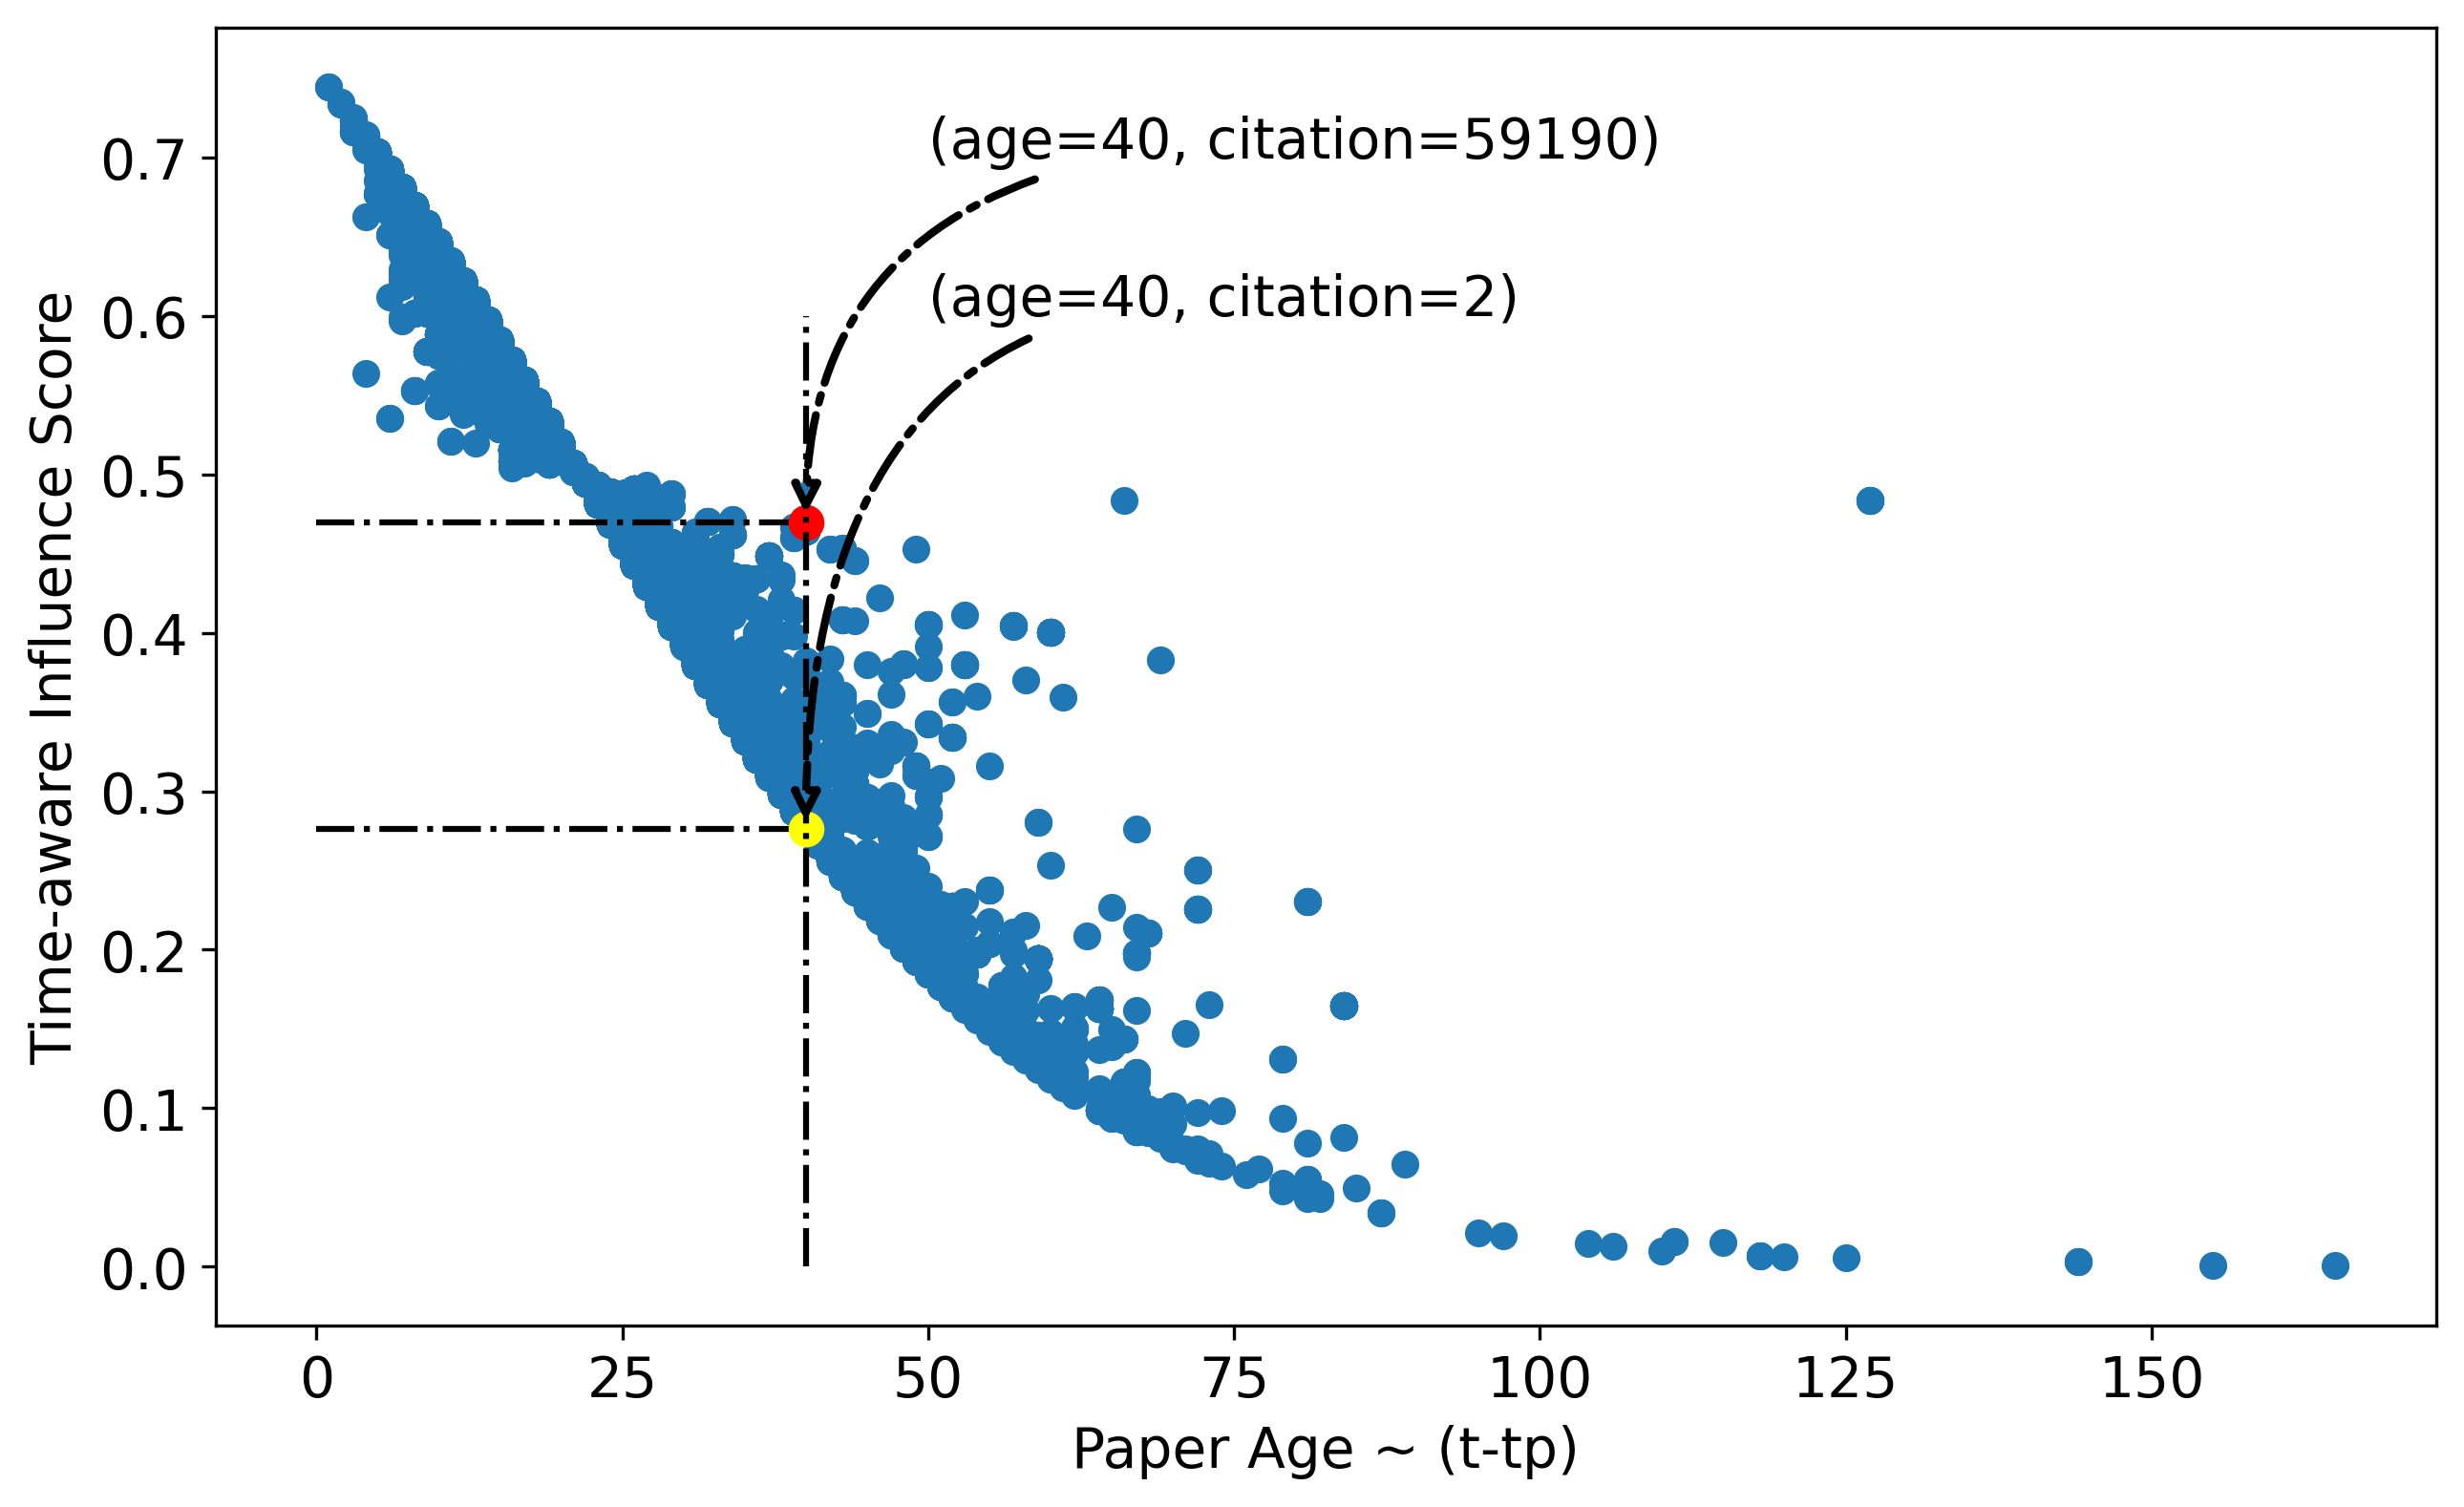

In [13]:
# def calculateFreshness(row):
# 	_y = .5
# 	impact = row['citation_count_standard_norm'] + 1
# 	numerator = 1
# 	denominator = 1 + np.exp(_y * (1 / impact) * row['age_standard_norm'])
# 	return numerator / denominator


# inf['influence_score'] = inf.apply(calculateFreshness, axis=1)

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.scatter(inf['age'], inf['influence_score'])
# ax.scatter(inf['age'], inf.apply(calculateFreshness, axis=1))
# plot([x1, x2], [y1, y2])
ax.annotate('(age=40, citation=59190)', xy=(40.0, 0.469922),
            xytext=(50, 0.7), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.469922, 0.469922], linestyle="-.", color="black")
ax.plot([40.0], [0.469922], marker="o", markersize=8,
         markeredgecolor="red", markerfacecolor="red")

ax.annotate('(age=40, citation=2)', xy=(40.0, 0.275956),
            xytext=(50, 0.6), arrowprops=dict(linestyle="-.", linewidth=2,
                                              arrowstyle="-|>",
                                              connectionstyle="angle3,angleA=0,angleB=90"))
#   
ax.plot([0, 40.0], [0.275956, 0.275956], linestyle="-.", color="black")
ax.plot([40.0], [0.275956], marker="o", markersize=8,
        markeredgecolor="yellow", markerfacecolor="yellow")
# vertical line
ax.plot([40.0, 40.0], [0, .6], linestyle="-.", color="black")

plt.xlabel('Paper Age ~ (t-tp)')
plt.ylabel('Time-aware Influence Score')

for f in ['png', 'svg','pdf']:
    save_plot(plt, 'plots/influence',
              'time_aware_influence_score_v1-10x6-dpi300-font-14', formatting=f)


## Bi-variate analysis

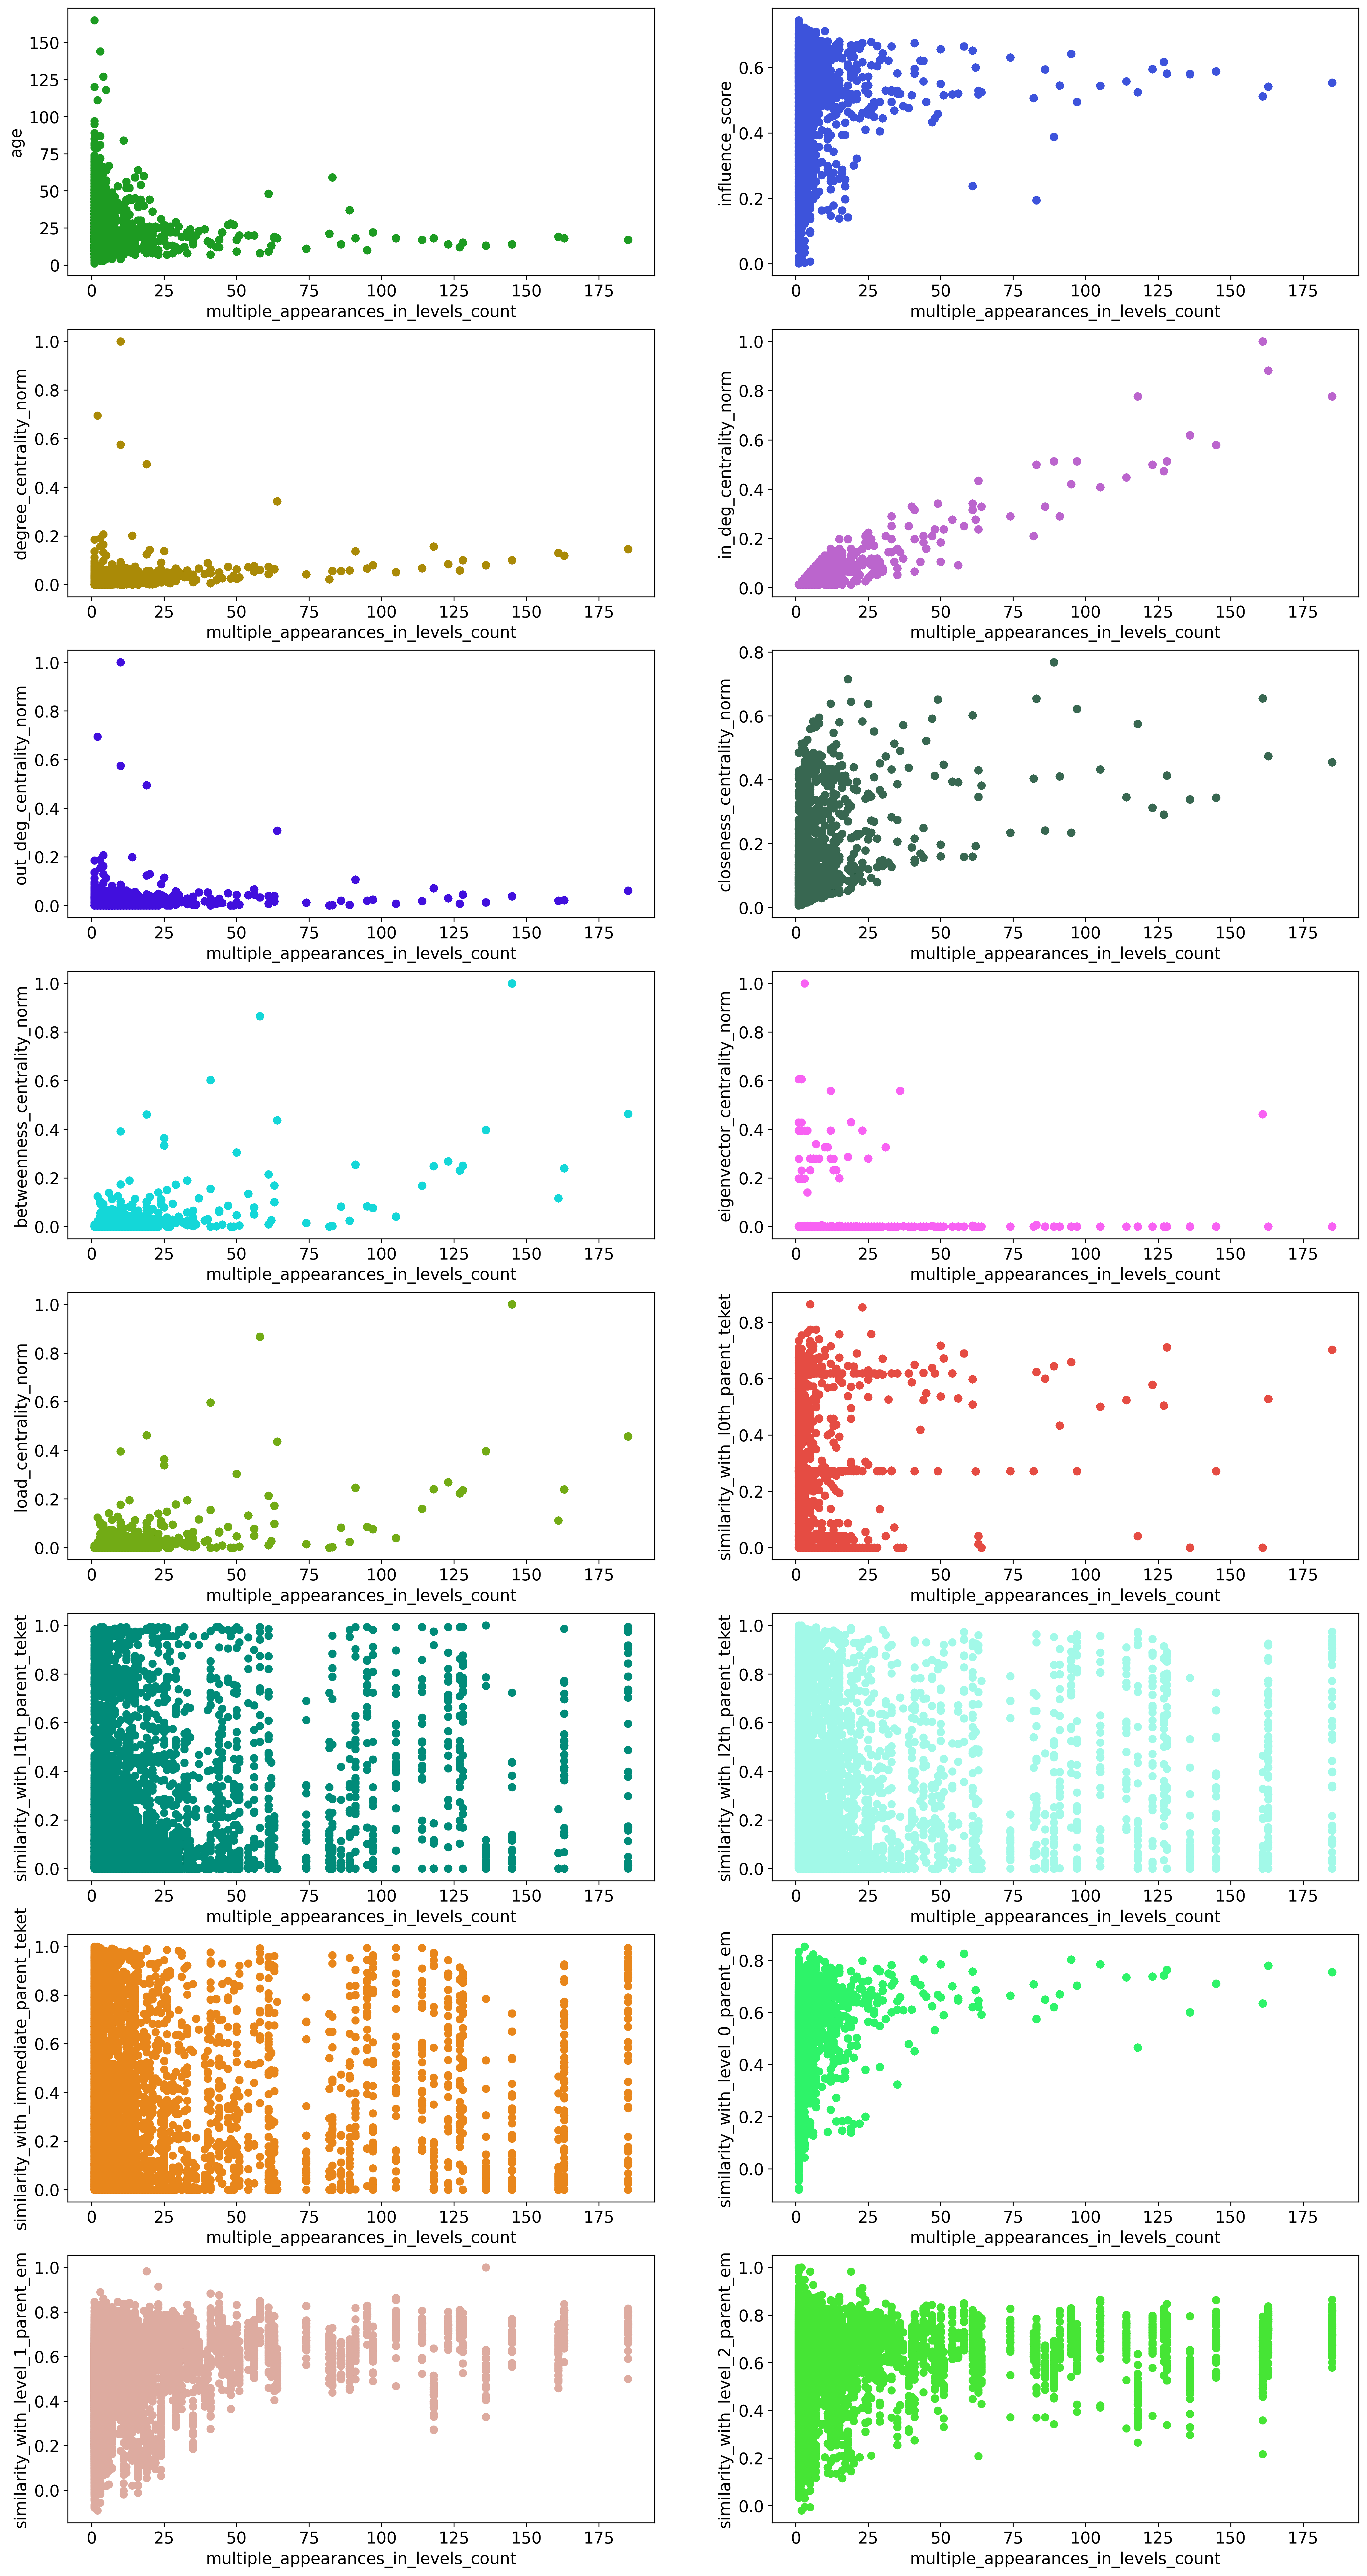

In [201]:
x = 'multiple_appearances_in_levels_count'
# x = 'similarity_with_l0th_parent_teket'
y_cols = [
    # 'level_no',
    'age',
    'influence_score',
    # 'multiple_appearances_in_levels_count',
    
    'degree_centrality_norm',
    'in_deg_centrality_norm',
    'out_deg_centrality_norm',
    'closeness_centrality_norm',
    'betweenness_centrality_norm',
    'eigenvector_centrality_norm',
    'load_centrality_norm',
    
    'similarity_with_l0th_parent_teket',
    'similarity_with_l1th_parent_teket',
    'similarity_with_l2th_parent_teket',
    'similarity_with_immediate_parent_teket',
    'similarity_with_level_0_parent_em',
    'similarity_with_level_1_parent_em',
    'similarity_with_level_2_parent_em',
]
plot_one_vs_all_subplots(df, x_col=x, y_cols=y_cols, figsize=(20, 40))


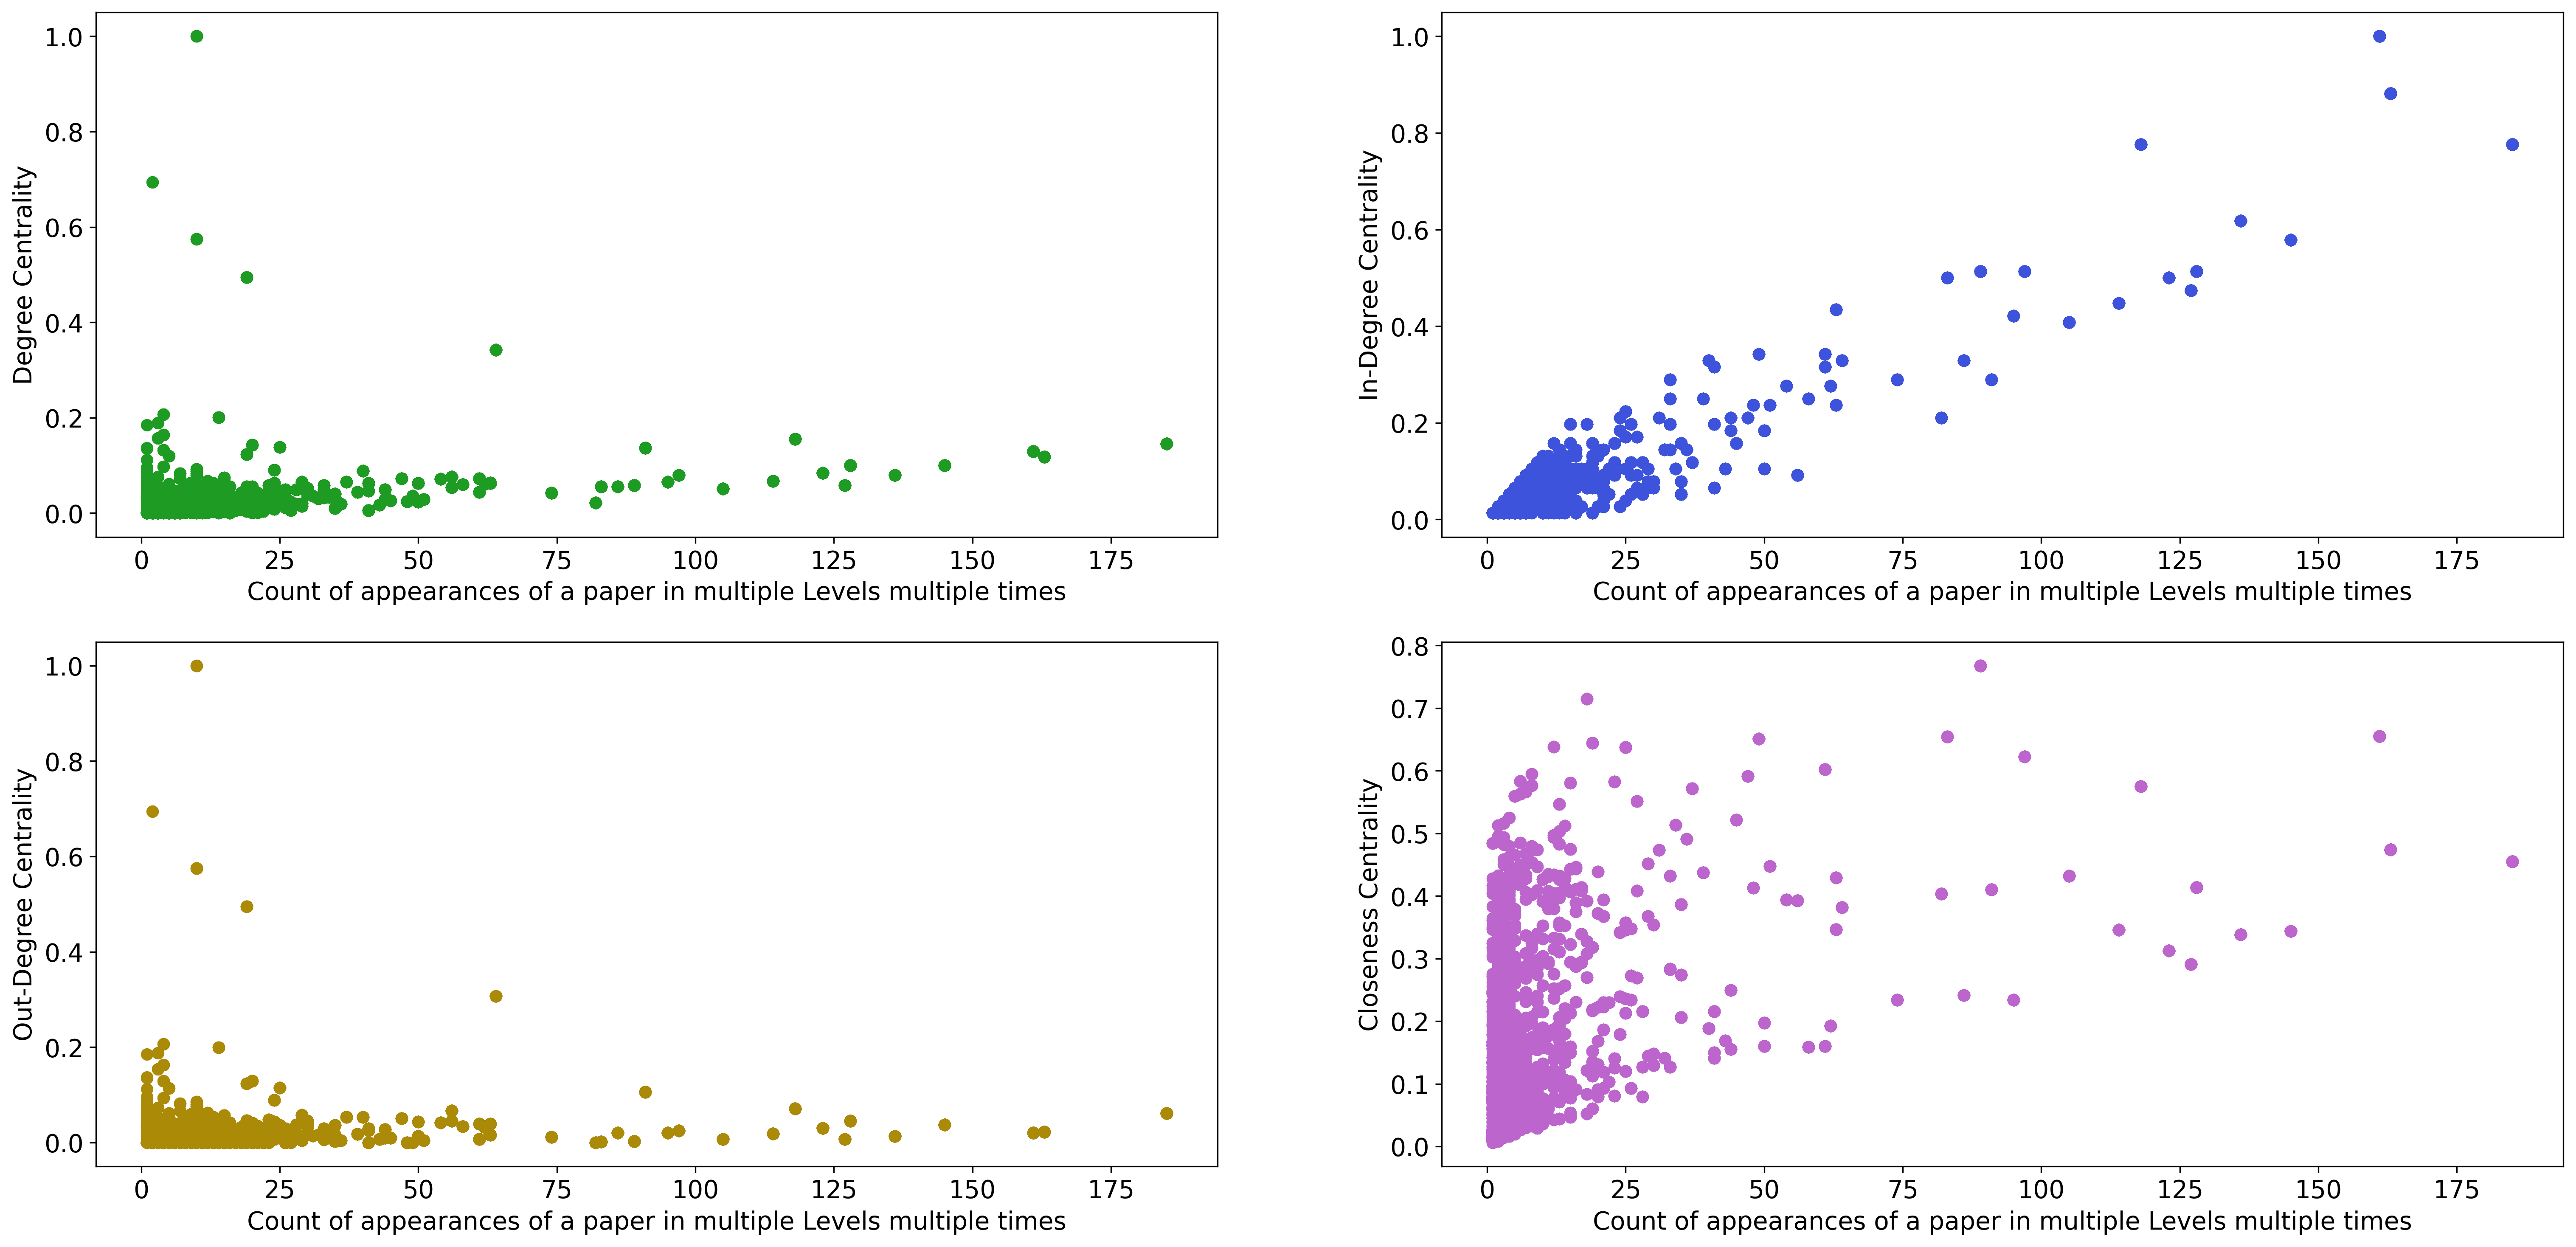

In [204]:
x = 'multiple_appearances_in_levels_count'

# x = 'similarity_with_l0th_parent_teket'
y_cols = [
    # 'level_no',
    # 'age',
    # 'influence_score',
    # 'multiple_appearances_in_levels_count',

    'degree_centrality_norm',
    'in_deg_centrality_norm',
    'out_deg_centrality_norm',
    'closeness_centrality_norm',
    # 'betweenness_centrality_norm',
    # 'eigenvector_centrality_norm',
    # 'load_centrality_norm',

    # 'similarity_with_l0th_parent_teket',
    # 'similarity_with_l1th_parent_teket',
    # 'similarity_with_l2th_parent_teket',
    # 'similarity_with_immediate_parent_teket',
    # 'similarity_with_level_0_parent_em',
    # 'similarity_with_level_1_parent_em',
    # 'similarity_with_level_2_parent_em',
]
y_label_dict = {
    'degree_centrality_norm': 'Degree Centrality',
    'in_deg_centrality_norm': 'In-Degree Centrality',
    'out_deg_centrality_norm': 'Out-Degree Centrality',
    'closeness_centrality_norm': 'Closeness Centrality',
    'betweenness_centrality_norm': 'Betweenness Centrality',
    'eigenvector_centrality_norm': 'Eigenvector Centrality',
    'load_centrality_norm': 'Load Centrality',
    'similarity_with_l0th_parent_teket': 'Similarity with parent at level 0',
    'similarity_with_l1th_parent_teket': 'Similarity with parent at level 1',
    'similarity_with_l2th_parent_teket': 'Similarity with parent at level 2',
    'similarity_with_immediate_parent_teket': 'Similarity with immediate parent',
}


save_format = 'svg'
save_path = 'plots/1vAll/appearance-countVall-4subplot-dpi300-font-14.svg'
plot_one_vs_all_subplots(df, x_col=x, y_cols=y_cols, figsize=(
    25, 12), x_label="Count of appearances of a paper in multiple Levels multiple times", 
    y_labels=True, y_labels_dict=y_label_dict,
    save_path=save_path, save_format=save_format)


## Aggregate analysis

### Centrality

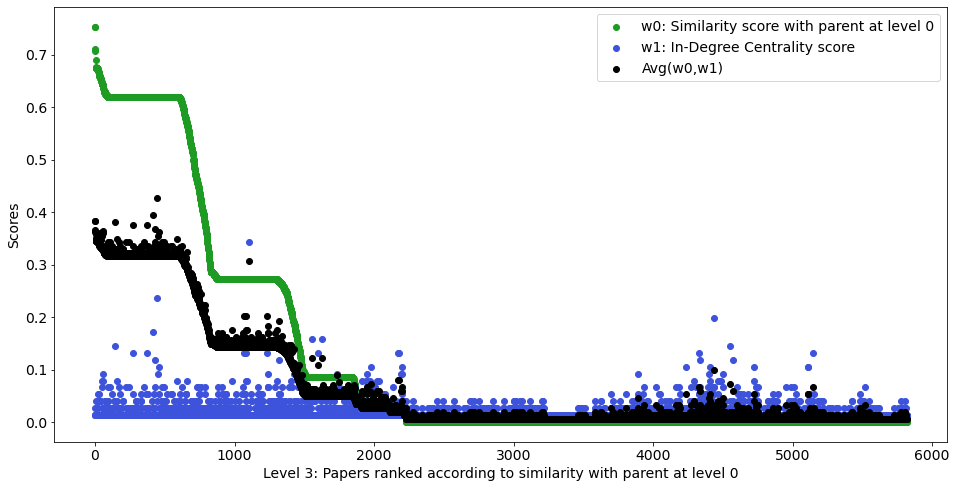

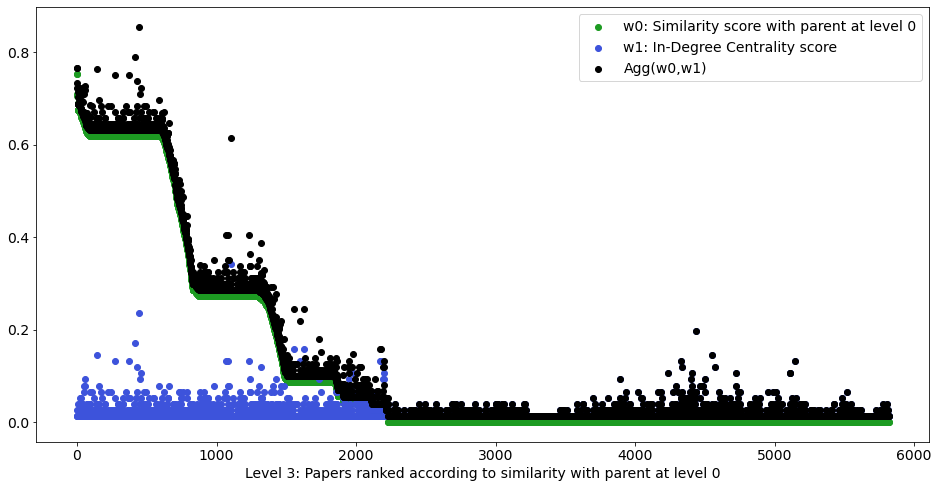

In [295]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    # 'degree_centrality_norm',
    # 'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']
all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

sum_cols = similarity_cols + centrality_cols
sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols
legend_dic = {
    'similarity_with_l0th_parent_teket': 'Similarity score with parent at level 0',
    'in_deg_centrality_norm': 'In-Degree Centrality score',
    'closeness_centrality_norm': 'Closeness Centrality score',
}
plot_level_i_top_k(data, sum_cols, cols_for_plots, sort_col=sort_col,
                   level_no=3, plot_type='scatter', legend_dic=legend_dic)

plot_level_i_top_k_agg(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter',legend_dic=legend_dic)

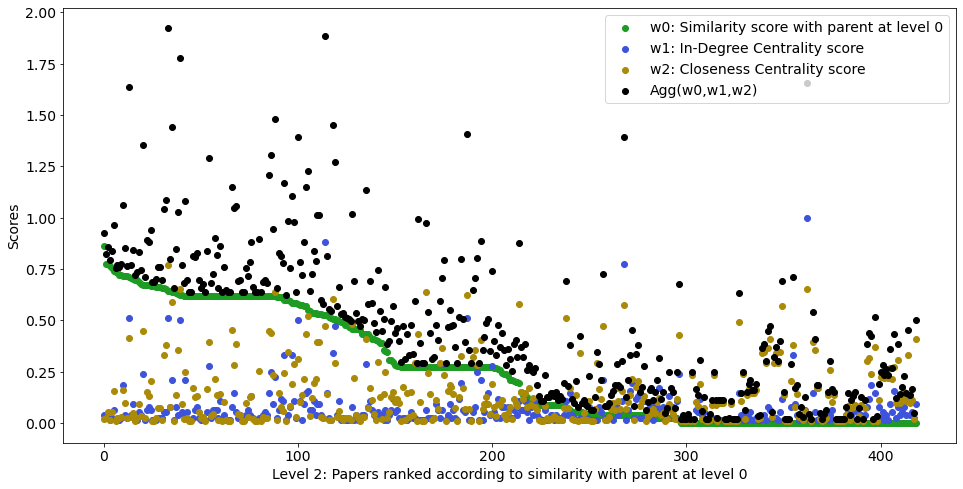

In [18]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    # 'degree_centrality_norm',
    'closeness_centrality_norm',
]
similarity_cols = ['similarity_with_l0th_parent_teket']
all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

sum_cols = similarity_cols + centrality_cols
sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

legend_dic = {
    'similarity_with_l0th_parent_teket': 'Similarity score with parent at level 0',
    'in_deg_centrality_norm': 'In-Degree Centrality score',
    'closeness_centrality_norm': 'Closeness Centrality score',
}

# save_path = 'plots/agg/level2-v1-avg.svg'
# save_format = 'svg'
# plot_level_i_top_k(data, sum_cols, cols_for_plots, sort_col=sort_col,
#                    level_no=2, plot_type='scatter', legend_dic=legend_dic,
#                    save_format=save_format,save_path=save_path)

# # save_path = 'plots/agg/level2-v1-agg.svg'
# # save_format = 'svg'
# plot_level_i_top_k_agg(data, sum_cols, cols_for_plots, sort_col=sort_col,
#                        level_no=2, plot_type='scatter', legend_dic=legend_dic,
#                           save_format=save_format, save_path=save_path
#                        )

# save_path = 'plots/agg/level2-v1-avg.png'
# save_format = 'png'
# plot_level_i_top_k(data, sum_cols, cols_for_plots, sort_col=sort_col,
#                    level_no=2, plot_type='scatter', legend_dic=legend_dic,
#                    save_format=save_format, save_path=save_path)

save_path = 'plots/agg/level2-v1-agg.pdf'
save_format = 'pdf'
plot_level_i_top_k_agg(data, sum_cols, cols_for_plots, sort_col=sort_col,
                       level_no=2, plot_type='scatter', legend_dic=legend_dic,
                       save_format=save_format, save_path=save_path
                       )


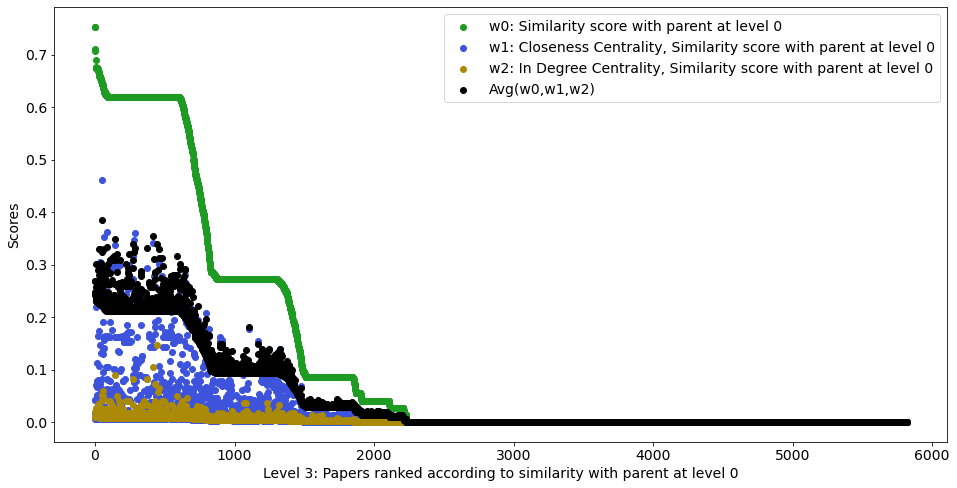

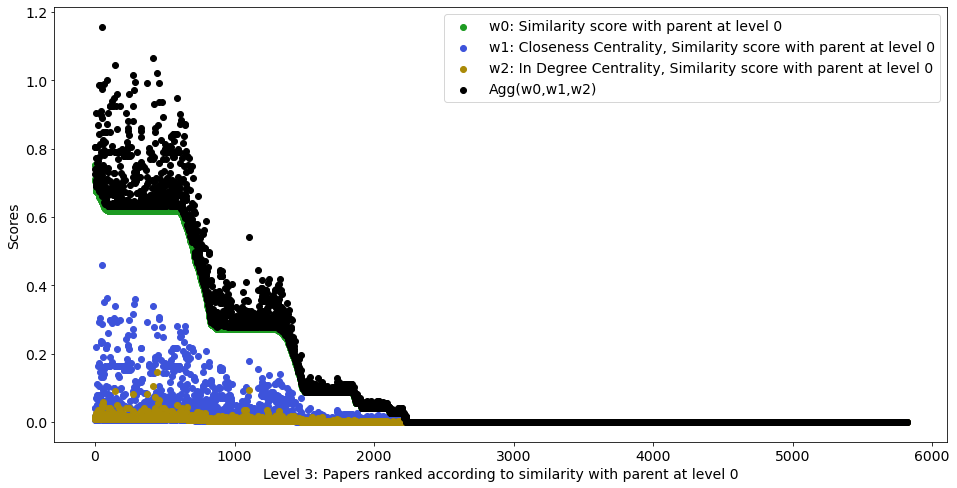

In [31]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = 'In Degree Centrality score, Similarity with parent at level 0'
f2 = 'Closeness Centrality score, Similarity with parent at level 0'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
# data[f3] = data['degree_centrality_norm'] * \
# 	data['similarity_with_l0th_parent_teket']
# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f3, f1, ]
sum_cols = similarity_cols + [f2,f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

legend_dic = {
    'similarity_with_l0th_parent_teket': 'Similarity score with parent at level 0',
    'In Degree Centrality score, Similarity with parent at level 0': 'In Degree Centrality, Similarity score with parent at level 0',
    'Closeness Centrality score, Similarity with parent at level 0': 'Closeness Centrality, Similarity score with parent at level 0',
}


# save_path = 'plots/agg/level3-v2-avg.svg'
# save_format = 'svg'
plot_level_i_top_k(data, sum_cols, cols_for_plots, sort_col=sort_col,
                   level_no=3, plot_type='scatter', legend_dic=legend_dic,
                   save_format=save_format, save_path=save_path)

# save_path = 'plots/agg/level3-v2-agg.svg'
# save_format = 'svg'
plot_level_i_top_k_agg(data, sum_cols, cols_for_plots, sort_col=sort_col,
                       level_no=3, plot_type='scatter', legend_dic=legend_dic,
                       save_format=save_format, save_path=save_path
                       )

# save_path = 'plots/agg/level3-v2-avg.png'
# save_format = 'png'
# plot_level_i_top_k(data, sum_cols, cols_for_plots, sort_col=sort_col,
#                    level_no=3, plot_type='scatter', legend_dic=legend_dic,
#                    save_format=save_format, save_path=save_path)

# save_path = 'plots/agg/level3-v2-agg.png'
# save_format = 'png'
# plot_level_i_top_k_agg(data, sum_cols, cols_for_plots, sort_col=sort_col,
#                        level_no=3, plot_type='scatter', legend_dic=legend_dic,
#                        save_format=save_format, save_path=save_path
#                        )


### Influence

<AxesSubplot:xlabel='similarity_with_l0th_parent_teket', ylabel='influence_score'>

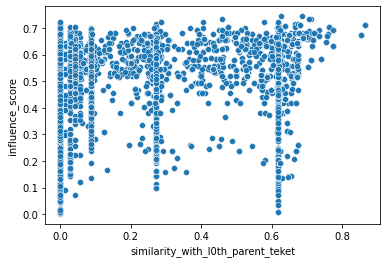

In [49]:
sns.scatterplot(data=data, x='similarity_with_l0th_parent_teket',
                y='influence_score')


<AxesSubplot:xlabel='age', ylabel='influence_score'>

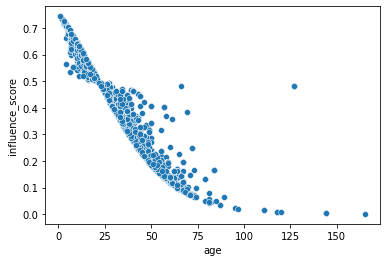

In [51]:
sns.scatterplot(data=data, x='age',
                y='influence_score')


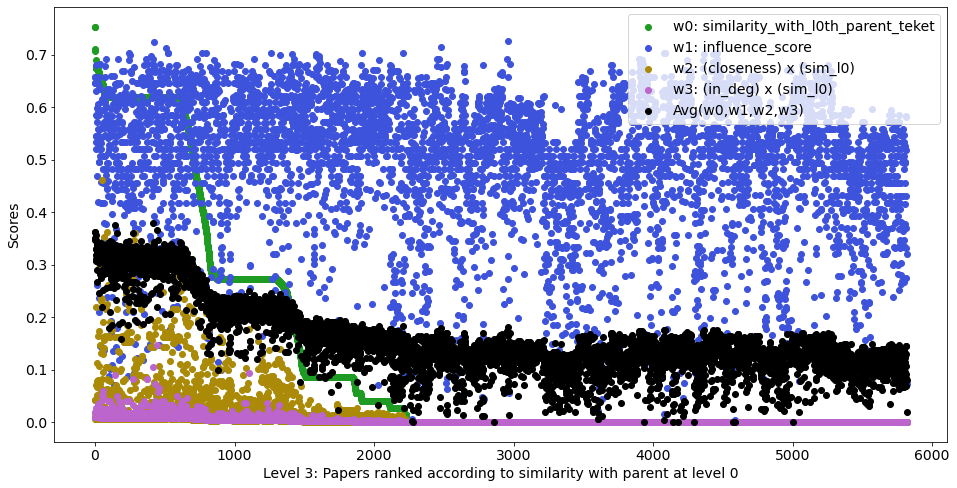

In [290]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = 'influence_score'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']


# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f3, f2,f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

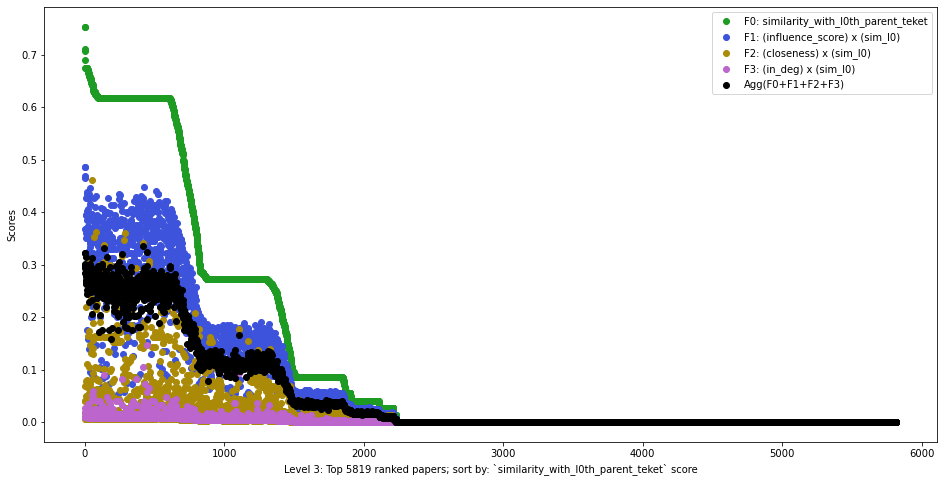

In [54]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(influence_score) x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']

# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f3, f2,f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

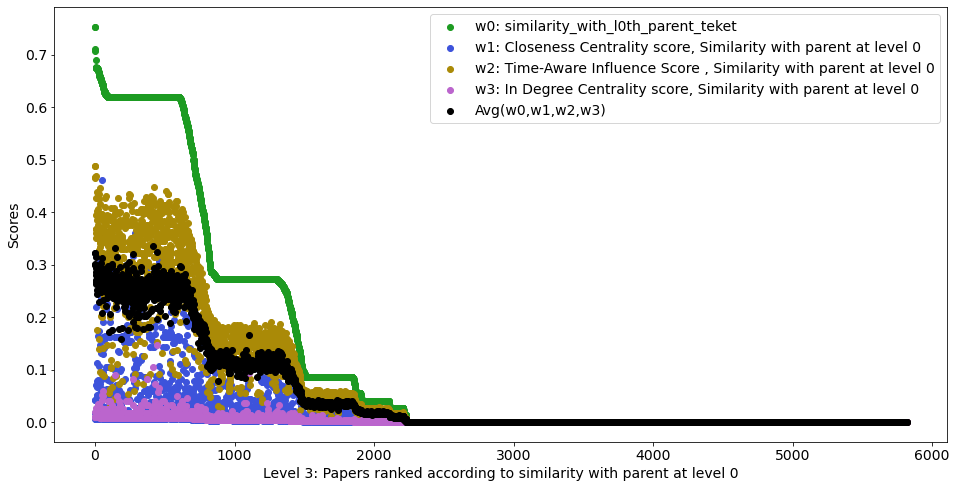

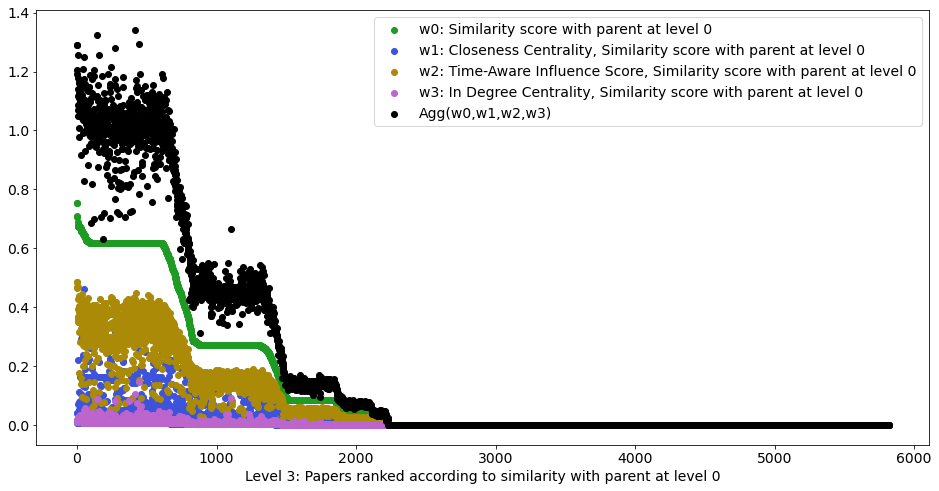

In [258]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = ['similarity_with_l0th_parent_teket']

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = 'In Degree Centrality score, Similarity with parent at level 0'
f2 = 'Closeness Centrality score, Similarity with parent at level 0'
f3 = 'Time-Aware Influence Score , Similarity with parent at level 0'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
	data['similarity_with_l0th_parent_teket']

# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f2,f3, f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

legend_dic = {
    'similarity_with_l0th_parent_teket': 'Similarity score with parent at level 0',
    'In Degree Centrality score, Similarity with parent at level 0': 'In Degree Centrality, Similarity score with parent at level 0',
    'Closeness Centrality score, Similarity with parent at level 0': 'Closeness Centrality, Similarity score with parent at level 0',
	'Time-Aware Influence Score , Similarity with parent at level 0': 'Time-Aware Influence Score, Similarity score with parent at level 0',
}
plot_level_i_top_k_agg(data, sum_cols, cols_for_plots,
                       sort_col=sort_col, level_no=3, plot_type='scatter', legend_dic=legend_dic)


### l 2 3

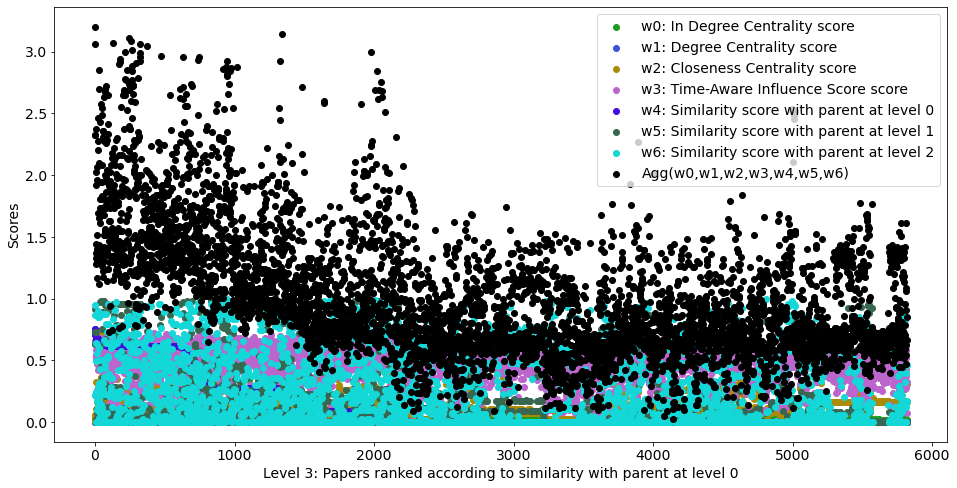

In [19]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',
	
	]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()


sum_cols = centrality_cols + ['influence_score']+similarity_cols 

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

legend_dic = {
    'similarity_with_l0th_parent_teket': 'Similarity score with parent at level 0',
    'similarity_with_l1th_parent_teket': 'Similarity score with parent at level 1',
    'similarity_with_l2th_parent_teket': 'Similarity score with parent at level 2',
    'in_deg_centrality_norm': 'In Degree Centrality score',
    'degree_centrality_norm': 'Degree Centrality score',
    'closeness_centrality_norm': 'Closeness Centrality score',
    'influence_score': 'Time-Aware Influence Score score',
    
}
# save_path = 'plots/agg/1-level2-all-avg.pdf'
# save_format = 'pdf'

# plot_level_i_top_k(data, sum_cols, cols_for_plots, sort_col=sort_col,
#                    level_no=2, plot_type='scatter', legend_dic=legend_dic,
#                    save_format=save_format, save_path=save_path)
save_path = 'plots/agg/1-level3-all-agg.pdf'
save_format = 'pdf'

plot_level_i_top_k_agg(data, sum_cols, cols_for_plots, sort_col=sort_col,
                       level_no=3, plot_type='scatter', legend_dic=legend_dic,
                       save_format=save_format, save_path=save_path
                       )


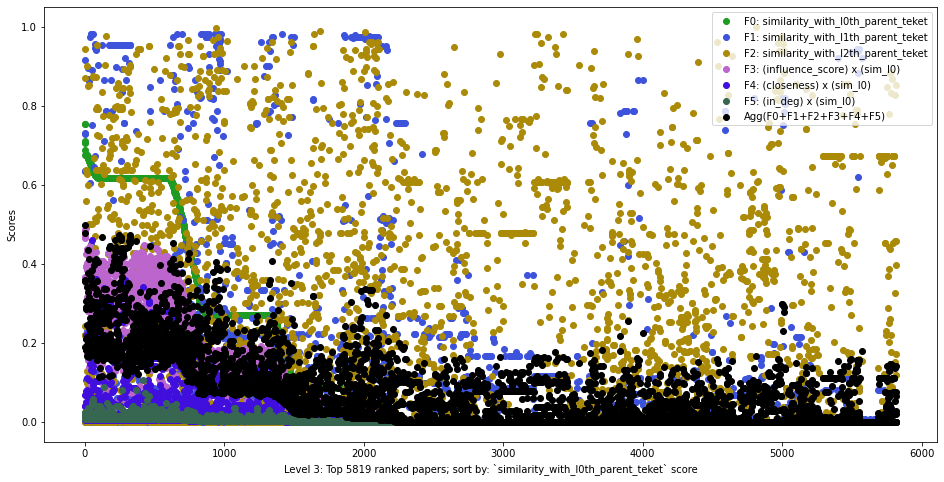

In [7]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',
	
	]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(influence_score) x (sim_l0)'
data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']
# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = similarity_cols + [f3, f2,f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

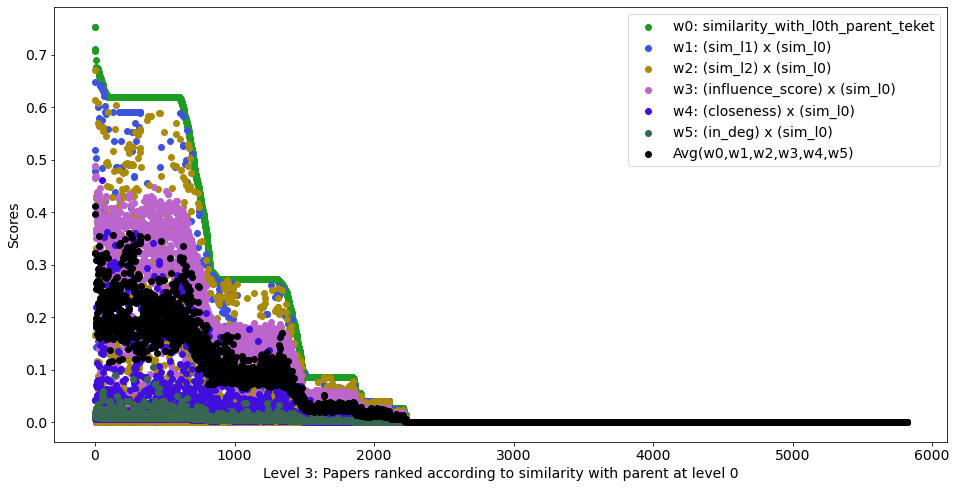

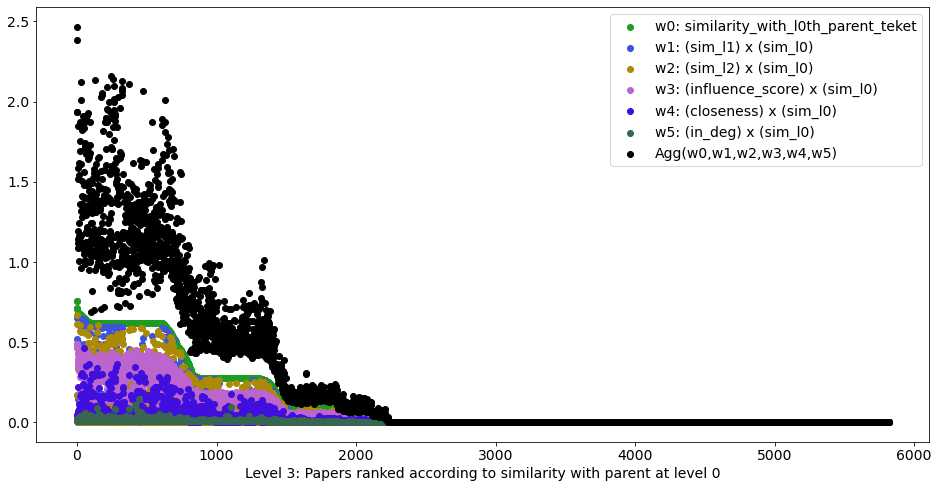

In [263]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',
	
	]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(influence_score) x (sim_l0)'
f4 = '(sim_l1) x (sim_l0)'
f5 = '(sim_l2) x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']
data[f4] = data['similarity_with_l1th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']
data[f5] = data['similarity_with_l2th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']


# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = ['similarity_with_l0th_parent_teket'] + [f4, f5,f3, f2, f1, ]

sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')
plot_level_i_top_k_agg(data,sum_cols,cols_for_plots,sort_col=sort_col, level_no=3, plot_type='scatter')

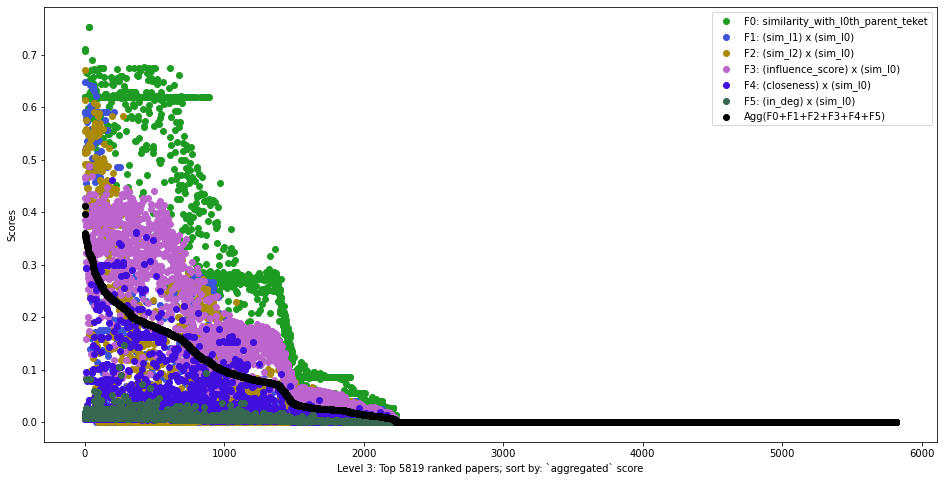

In [73]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
] 
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',
	
	]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = '(in_deg) x (sim_l0)'
f2= '(closeness) x (sim_l0)'
f3 = '(influence_score) x (sim_l0)'
f4 = '(sim_l1) x (sim_l0)'
f5 = '(sim_l2) x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']
data[f4] = data['similarity_with_l1th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']
data[f5] = data['similarity_with_l2th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']


# sum_cols = similarity_cols + [f1,]
# sum_cols = similarity_cols + [f2,f1, ]
sum_cols = ['similarity_with_l0th_parent_teket'] + [f4, f5,f3, f2, f1, ]

# sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

plot_level_i_top_k(data,sum_cols,cols_for_plots,level_no=3, plot_type='scatter')#,sort_col=sort_col, )

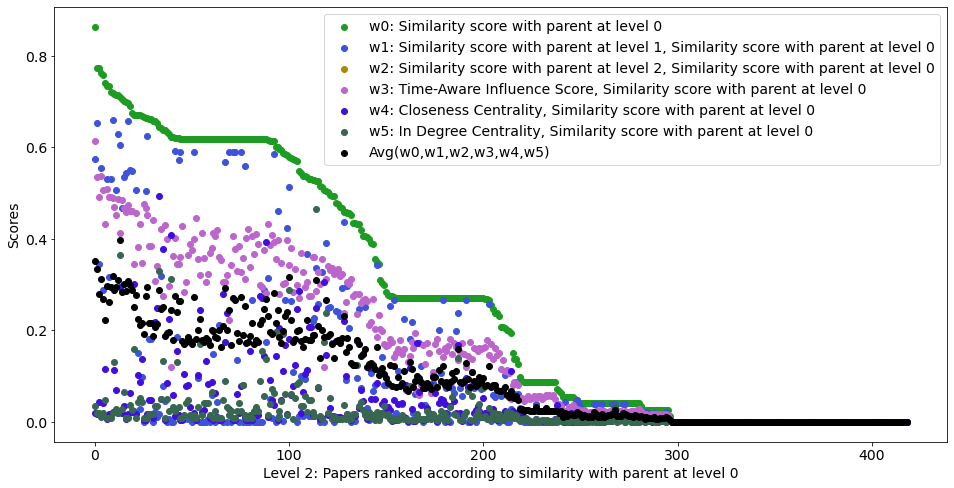

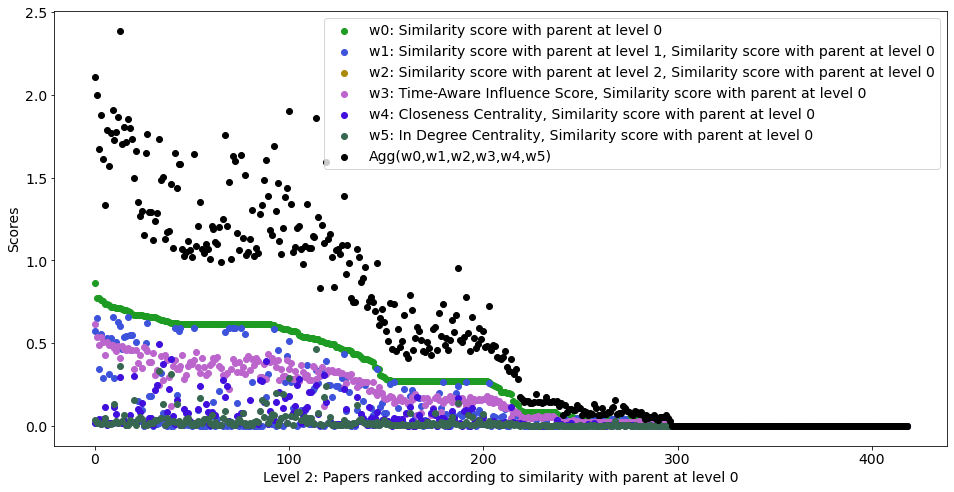

In [21]:
info_cols = ['paper_id', 'level_no']
centrality_cols = [
    'in_deg_centrality_norm',
    'degree_centrality_norm',
    'closeness_centrality_norm',
]
similarity_cols = [
	'similarity_with_l0th_parent_teket',
	'similarity_with_l1th_parent_teket',
	'similarity_with_l2th_parent_teket',

]

all_cols = centrality_cols + similarity_cols + info_cols
data = df.copy()

f1 = 'In Degree Centrality score, Similarity with parent at level 0'
f2 = 'Closeness Centrality score, Similarity with parent at level 0'
f3 = 'Time-Aware Influence Score , Similarity with parent at level 0'
f4 = 'Similarity with parent at level 1, Similarity with parent at level 0'
f5 = 'Similarity with parent at level 2, Similarity with parent at level 0'
# f1 = '(in_deg) x (sim_l0)'
# f2 = '(closeness) x (sim_l0)'
# f3 = '(influence_score) x (sim_l0)'
# f4 = '(sim_l1) x (sim_l0)'
# f5 = '(sim_l2) x (sim_l0)'

data[f1] = data['in_deg_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f2] = data['closeness_centrality_norm'] * \
	data['similarity_with_l0th_parent_teket']
data[f3] = data['influence_score'] * \
    data['similarity_with_l0th_parent_teket']
data[f4] = data['similarity_with_l1th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']
data[f5] = data['similarity_with_l2th_parent_teket'] * \
	data['similarity_with_l0th_parent_teket']



sum_cols = ['similarity_with_l0th_parent_teket'] + [f4, f5, f3, f2, f1, ]


sort_col = 'similarity_with_l0th_parent_teket'
cols_for_plots = sum_cols

legend_dic = {
    'similarity_with_l0th_parent_teket': 'Similarity score with parent at level 0',
    'In Degree Centrality score, Similarity with parent at level 0': 'In Degree Centrality, Similarity score with parent at level 0',
    'Closeness Centrality score, Similarity with parent at level 0': 'Closeness Centrality, Similarity score with parent at level 0',
   	'Time-Aware Influence Score , Similarity with parent at level 0': 'Time-Aware Influence Score, Similarity score with parent at level 0',
    'Similarity with parent at level 1, Similarity with parent at level 0': 'Similarity score with parent at level 1, Similarity score with parent at level 0',
    'Similarity with parent at level 2, Similarity with parent at level 0': 'Similarity score with parent at level 2, Similarity score with parent at level 0',
}
save_path = 'plots/agg/2-level2-allxsim0-avg.svg'
save_format = 'svg'

plot_level_i_top_k(data, sum_cols, cols_for_plots, sort_col=sort_col,
                   level_no=2, plot_type='scatter', legend_dic=legend_dic,
                   save_format=save_format, save_path=save_path)
save_path = 'plots/agg/2-level2-allxsim0-agg.svg'
save_format = 'svg'

plot_level_i_top_k_agg(data, sum_cols, cols_for_plots, sort_col=sort_col,
                       level_no=2, plot_type='scatter', legend_dic=legend_dic,
                       save_format=save_format, save_path=save_path
                       )
